In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [2]:
#data import
main_df = pd.read_csv ('../data/cleaned_energy_data.csv')
main_df.head()

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids
0,World,1992,5.481774e+06,65.769659,64.426755,6.923158,51013.270526,353.718416,92.558725,76.984223,135.972335,21.27974,48.203133,26.923393,353.172922,90.407295,77.110508,137.804392,21.27974,47.850728,26.570987,31264.357,17794.06836,481679.269000,400.464479,30667.877,17854.85234,494096.4675,400.795117,22529.424264,8587.186368,4076.853622,9865.384274
1,Afghanistan,1992,1.448550e+04,51.641000,2.159523,1.042253,30.013600,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.00000,0.000000,0.131000,0.000,0.00000,0.0000,0.000000,1.704078,0.015551,0.588528,1.100000
2,Albania,1992,3.245890e+03,71.802000,25.937798,8.087302,10.410300,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.00000,104.719450,0.104000,0.000,0.00000,0.0000,0.560000,3.901890,0.502372,0.199519,3.200000
3,Algeria,1992,2.702830e+04,67.575000,48.164981,5.592648,232.773000,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.00000,1139.243484,0.125000,279.400,1240.61590,0.0000,1.061000,74.390488,2.687475,45.703013,26.000000
4,Angola,1992,1.265740e+04,45.230000,6.689229,1.423070,59.496900,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.00000,0.000000,0.000000,508.400,0.00000,0.0000,0.000000,5.218203,0.000000,1.118203,4.100000


In [3]:
main_df.drop(main_df[main_df['country']=='World'].index, inplace= True)

In [4]:
#checking dimensions
main_df.shape

(4697, 33)

In [5]:
set(main_df['country'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo-Brazzaville',
 'Congo-Kinshasa',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Côte d’Ivoire',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',


In [6]:
#function to filter oil exporting countries 
def oil_exp_countries (country_name):
    if country_name in ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran', 
                        'Iraq', 'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates',
                       'Venezuela', 'United States', 'Russia', 'China' ]:
        return 1
    else:
        return 0
    

In [7]:
#applying funtion to dataframe
main_df ['oil_exporting']= main_df.apply(lambda x:oil_exp_countries(x['country']), axis =1)

In [8]:
#crosschecking number of countries
oil_exporting= main_df[main_df['oil_exporting']== 1]
len(set(oil_exporting['country']))

16

In [9]:
#2018 data
df_2018 = main_df[main_df['year']==2018]
df_2018.head()

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,oil_exporting
4550,Afghanistan,2018,37173.5000,64.486,3.431825,1.670275,76.3784,0.063176,0.048392,0.005998,0.000000,NaN,0.008785,0.008785,0.127573,0.050939,0.005998,0.044838,NaN,0.025798,0.025798,0.00,0.0,0.000000,4.986,0.000,0.000000,0.0,0.000,8.274967,4.752619,0.318252,3.204096,0
4551,Albania,2018,2882.0500,78.458,48.244140,3.710112,37.4765,0.115529,0.000107,0.001514,0.036821,NaN,0.077088,0.077088,0.139042,0.002180,0.001504,0.064531,NaN,0.070827,0.070827,0.00,0.0,87.665950,0.850,10.532,0.000000,0.0,1.764,4.031246,0.204280,0.079780,3.747186,0
4552,Algeria,2018,42209.8000,76.693,59.590421,4.980535,505.0260,6.688079,0.000000,3.541625,3.139810,NaN,0.006644,0.006644,2.515300,0.000410,1.680478,0.826375,NaN,0.008037,0.008037,4.08,0.0,16.471846,0.506,633.519,1807.311531,0.0,0.597,145.987969,0.232647,89.160554,56.594767,1
4553,Angola,2018,30833.3000,60.782,12.616891,1.994526,195.0440,3.792675,0.000000,0.227785,3.484186,NaN,0.080704,0.080704,0.389020,0.000000,0.031647,0.276669,NaN,0.080704,0.080704,0.00,0.0,0.000000,0.000,1367.399,187.333510,0.0,0.000,21.203161,0.000000,1.679088,19.524073,1
4554,Antigua and Barbuda,2018,96.1852,76.885,107.660569,5.027115,2.0599,0.000119,0.000000,0.000000,0.000000,NaN,0.000119,0.000119,0.010355,0.000000,0.000000,0.010236,NaN,0.000119,0.000119,0.00,0.0,0.000000,0.000,0.000,0.000000,0.0,0.000,0.734889,0.000000,0.000000,0.734889,0


In [10]:
# Let's prepare our X matrix
X = df_2018[['life_expectancy','oil_exporting']]
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [11]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(Xs)

KMeans(n_clusters=3, random_state=42)

In [12]:
km.cluster_centers_

array([[-0.22272238,  3.14245127],
       [ 0.60987312, -0.31822291],
       [-1.17467294, -0.31822291]])

In [13]:
# Option 1: Class attribute
km.labels_

array([2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1,
       2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2],
      dtype=int32)

In [14]:
# Option 2: Predict
km.predict(Xs)

array([2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1,
       2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2],
      dtype=int32)

In [15]:
# attach cluster to original points
df_2018['cluster']= km.labels_

<ipython-input-15-5f479e595013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['cluster']= km.labels_


In [16]:
df_2018.groupby('cluster').mean()

,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,oil_exporting
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2018,148942.309375,70.542889,149.944673,5.963885,3206.311775,23.617318,6.879715,5.388227,8.586777,3.316518,2.762598,1.933468,20.072032,6.798424,4.947436,5.688215,3.316518,2.637956,1.808827,1076.955812,553.415677,21483.619775,5.969038,1985.239500,987.377190,22050.342209,3.809218,1255.758279,642.942828,261.120899,351.694551,1
1,2018,24523.312544,76.848435,113.487978,4.239363,537.593674,1.722633,0.350621,0.469111,0.486217,0.565054,0.416684,0.304740,2.073932,0.312796,0.535591,0.827929,0.565054,0.397616,0.285672,223.260198,288.647081,8346.467556,5.195482,133.296811,213.352720,10185.250720,5.187096,120.597767,29.850179,28.416672,62.330917,0
2,2018,49379.458404,63.333423,18.596024,2.698841,261.049127,0.672154,0.366055,0.132998,0.074431,0.210531,0.098670,0.086524,0.920217,0.410353,0.112016,0.298711,0.210531,0.099136,0.086990,101.704038,28.757365,5255.637735,0.854928,11.165654,47.628838,2832.172854,1.341723,65.475168,39.641805,5.943189,19.890175,0


In [17]:
## Create a dataframe for cluster_centers (centroids)

centroids = df_2018.groupby('cluster').mean()

<ipython-input-18-66f8ea2c88ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['color'] = df_2018['cluster'].map(lambda p: colors[p])


<Figure size 504x504 with 0 Axes>

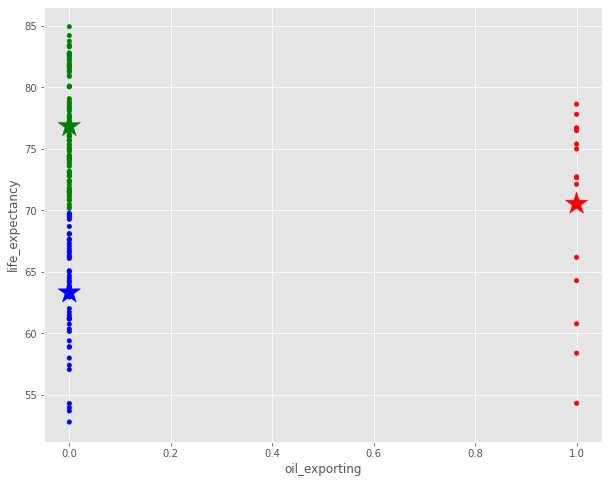

In [18]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df_2018['color'] = df_2018['cluster'].map(lambda p: colors[p])

ax = df_2018.plot(    
    kind="scatter", 
    x="oil_exporting", y="life_expectancy",
    figsize=(10,8),
    c = df_2018['color']
)

centroids.plot(
    kind="scatter", 
    x="oil_exporting", y="life_expectancy", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

In [19]:
main_df.head()

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,oil_exporting
1,Afghanistan,1992,14485.5000,51.641,2.159523,1.042253,30.01360,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.0,0.000000,0.131,0.0,0.0000,0.0,0.000,1.704078,0.015551,0.588528,1.1,0
2,Albania,1992,3245.8900,71.802,25.937798,8.087302,10.41030,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.0,104.719450,0.104,0.0,0.0000,0.0,0.560,3.901890,0.502372,0.199519,3.2,0
3,Algeria,1992,27028.3000,67.575,48.164981,5.592648,232.77300,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.0,1139.243484,0.125,279.4,1240.6159,0.0,1.061,74.390488,2.687475,45.703013,26.0,1
4,Angola,1992,12657.4000,45.230,6.689229,1.423070,59.49690,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.0,0.000000,0.000,508.4,0.0000,0.0,0.000,5.218203,0.000000,1.118203,4.1,1
5,Antigua and Barbuda,1992,64.9886,72.006,91.763340,5.867116,1.01644,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.005964,0.000000,0.000000,0.005964,NaN,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0000,0.0,0.000,0.400000,0.000000,0.000000,0.4,0


In [20]:
df_2018.groupby('oil_exporting')['life_expectancy'].mean()

oil_exporting
0    72.400457
1    70.542889
Name: life_expectancy, dtype: float64

In [21]:
main_df.groupby(['oil_exporting','year']).mean()

population  life_expectancy  consumption_per_capita  \
oil_exporting year                                                           
0             1992   22349.453586        64.930496               70.499801   
              1993   23026.944978        64.919971               71.281049   
              1994   23415.953126        65.067914               71.222498   
              1995   23799.922102        65.217652               71.907112   
              1996   24184.582336        65.446168               72.569729   
              1997   24259.183566        65.756073               73.366700   
              1998   24948.653824        65.875391               74.230603   
              1999   25328.515294        66.122727               73.937703   
              2000   25546.717228        66.471192               77.577801   
              2001   25926.281249        66.761052               76.542730   
              2002   25982.251209        67.097125               77.465311   
              2003   26697.974925        67.300422               78.604258   
              2004   27088.168206        67.684274               81.001223   
              2005   27479.570354        67.990549               82.261940   
              2006   27872.757901        68.354869               83.523435   
              2007   28269.130625        68.716093               83.714812   
              2008   28667.622356        69.113231               83.340907   
              2009   29063.969385        69.523707               78.944572   
              2010   29275.296585        69.985356               81.828972   
              2011   29858.572896        70.322426               79.885654   
              2012   30260.257957        70.676642               81.885836   
              2013   30668.180682        71.033516               81.071641   
              2014   31076.517370        71.380789               80.474052   
              2015   31469.497266        71.638766               80.417095   
              2016   31880.732196        71.939817               81.179154   
              2017   32291.317278        72.180996               82.372184   
              2018   32703.816245        72.400457               82.257714   
1             1992  117467.121187        63.957578              138.626688   
              1993  118833.317938        64.001898              136.935568   
              1994  120136.684938        64.145537              138.679808   
              1995  121423.008000        64.309105              140.880730   
              1996  122687.691500        64.550123              141.897791   
              1997  123918.784313        64.769066              147.230850   
              1998  125116.465375        64.944265              146.268763   
              1999  126292.887812        65.034383              145.209841   
              2000  127440.805625        65.179015              147.101887   
              2001  128567.967000        65.380250              147.221672   
              2002  129659.656125        65.587898              151.706084   
              2003  130732.205625        65.826697              151.262552   
              2004  131820.922438        66.142486              150.778731   
              2005  132946.464813        66.426785              159.057416   
              2006  134131.458375        66.813585              154.207825   
              2007  135328.363500        67.199227              152.927019   
              2008  136542.095562        67.545206              155.700275   
              2009  137772.905562        67.934805              152.080652   
              2010  139030.050625        68.271730              152.378227   
              2011  140274.278188        68.639523              152.702053   
              2012  141559.103125        68.967166              154.271512   
              2013  142851.268125        69.281890              154.161170   
              2014  144137.389375        69.5

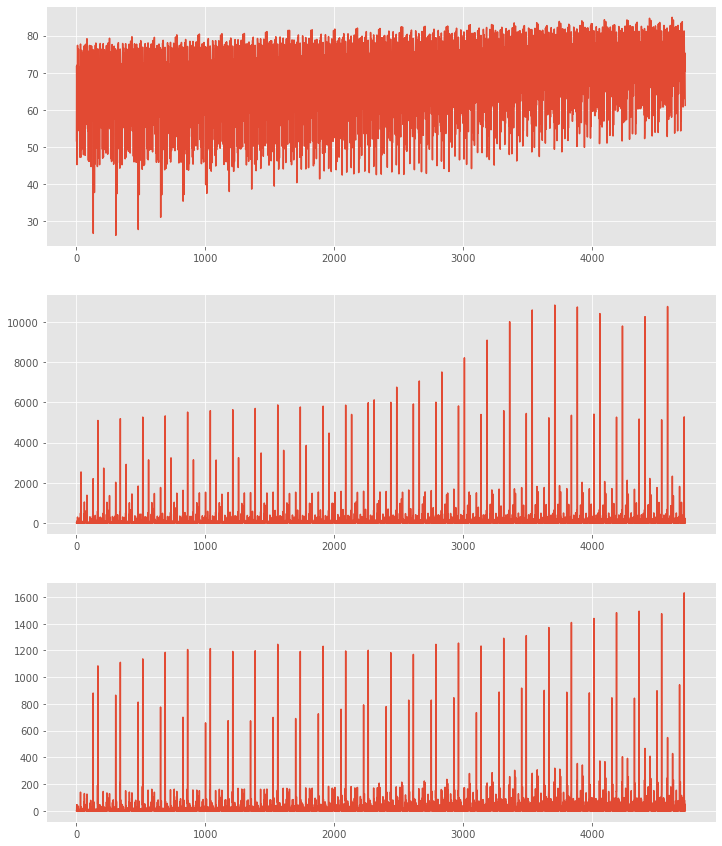

In [22]:
fig, ax = plt.subplots(nrows = 3, figsize = (12,15))

ax[0].plot(main_df['life_expectancy'], label = 'life_expectancy')
ax[1].plot(main_df['emissions_co2_emissions'], label = 'emissions_co2_emissions')
ax[2].plot(main_df['emissions_consumed_natural_gas'], label = 'emissions_consumed_natural_gas')

<AxesSubplot:xlabel='life_expectancy', ylabel='oil_exporting'>

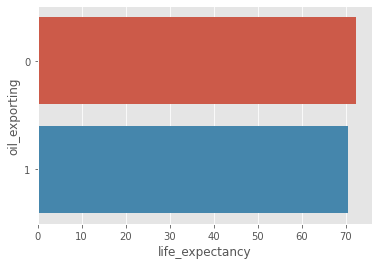

In [23]:
sns.barplot(x = df_2018.groupby('oil_exporting')['life_expectancy'].mean(),
            y= df_2018.groupby('oil_exporting')['life_expectancy'].mean().index, orient='h')

<AxesSubplot:xlabel='life_expectancy', ylabel='oil_exporting'>

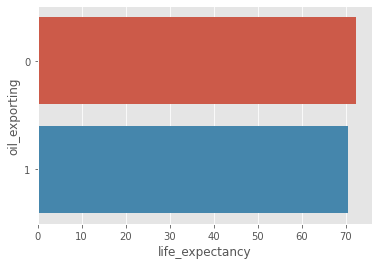

In [24]:
sns.barplot(x= main_df[main_df['year']==2018].groupby('oil_exporting')['life_expectancy'].mean(),
            y= main_df[main_df['year']==2018].groupby('oil_exporting')['life_expectancy'].mean().index, orient='h')

<AxesSubplot:xlabel='life_expectancy', ylabel='oil_exporting'>

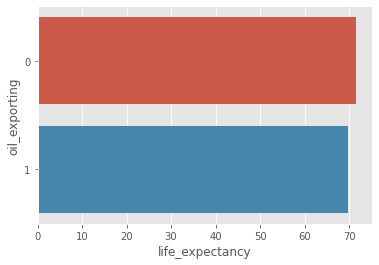

In [25]:
sns.barplot(x= main_df[main_df['year']==2015].groupby('oil_exporting')['life_expectancy'].mean(),
            y= main_df[main_df['year']==2015].groupby('oil_exporting')['life_expectancy'].mean().index, orient='h')
    

<AxesSubplot:xlabel='life_expectancy', ylabel='oil_exporting'>

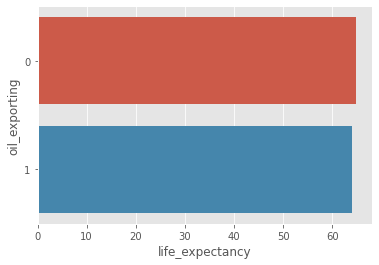

In [26]:
sns.barplot(x= main_df[main_df['year']==1992].groupby('oil_exporting')['life_expectancy'].mean(),
            y= main_df[main_df['year']==1992].groupby('oil_exporting')['life_expectancy'].mean().index, orient='h')
    

<AxesSubplot:xlabel='life_expectancy', ylabel='oil_exporting'>

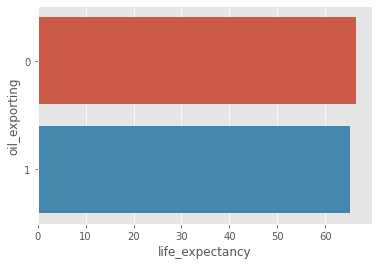

In [27]:
sns.barplot(x= main_df[main_df['year']==2000].groupby('oil_exporting')['life_expectancy'].mean(),
            y= main_df[main_df['year']==2000].groupby('oil_exporting')['life_expectancy'].mean().index, orient='h')

<AxesSubplot:xlabel='life_expectancy', ylabel='oil_exporting'>

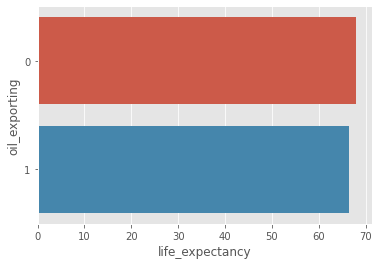

In [28]:
sns.barplot(x= main_df[main_df['year']==2005].groupby('oil_exporting')['life_expectancy'].mean(),
            y= main_df[main_df['year']==2005].groupby('oil_exporting')['life_expectancy'].mean().index, orient='h')

<AxesSubplot:xlabel='life_expectancy', ylabel='oil_exporting'>

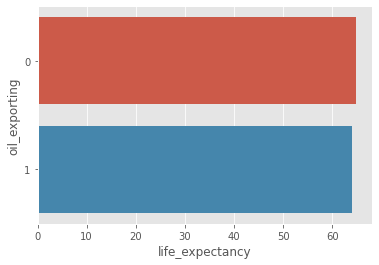

In [29]:
sns.barplot(x= main_df[main_df['year']==1992].groupby('oil_exporting')['life_expectancy'].mean(),
            y= main_df[main_df['year']==1992].groupby('oil_exporting')['life_expectancy'].mean().index, orient='h')

<AxesSubplot:xlabel='emissions_consumed_natural_gas', ylabel='oil_exporting'>

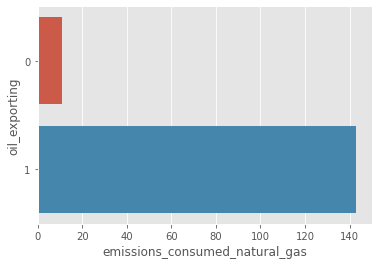

In [30]:
sns.barplot(x= main_df[main_df['year']==1992].groupby('oil_exporting')['emissions_consumed_natural_gas'].mean(),
            y= main_df[main_df['year']==1992].groupby('oil_exporting')['emissions_consumed_natural_gas'].mean().index, orient='h')

<AxesSubplot:xlabel='emissions_consumed_natural_gas', ylabel='oil_exporting'>

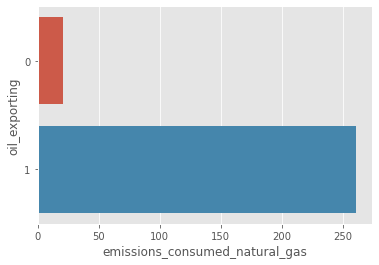

In [31]:
sns.barplot(x= main_df[main_df['year']==2018].groupby('oil_exporting')['emissions_consumed_natural_gas'].mean(),
            y= main_df[main_df['year']==2018].groupby('oil_exporting')['emissions_consumed_natural_gas'].mean().index, orient='h')

<AxesSubplot:xlabel='emissions_petroleum_and_other_liquids', ylabel='oil_exporting'>

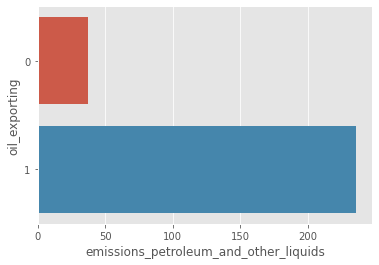

In [32]:
sns.barplot(x= main_df[main_df['year']==1992].groupby('oil_exporting')['emissions_petroleum_and_other_liquids'].mean(),
            y= main_df[main_df['year']==1992].groupby('oil_exporting')['emissions_petroleum_and_other_liquids'].mean().index, orient='h')

<AxesSubplot:xlabel='emissions_petroleum_and_other_liquids', ylabel='oil_exporting'>

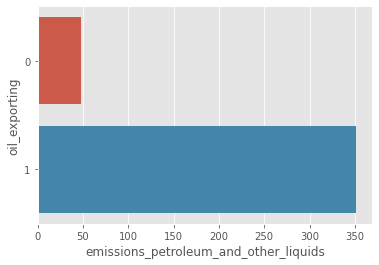

In [33]:
sns.barplot(x= main_df[main_df['year']==2018].groupby('oil_exporting')['emissions_petroleum_and_other_liquids'].mean(),
            y= main_df[main_df['year']==2018].groupby('oil_exporting')['emissions_petroleum_and_other_liquids'].mean().index, orient='h')

<AxesSubplot:xlabel='emissions_co2_emissions', ylabel='oil_exporting'>

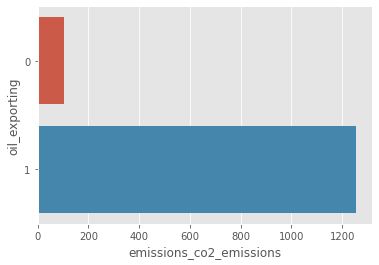

In [34]:
sns.barplot(x= main_df[main_df['year']==2018].groupby('oil_exporting')['emissions_co2_emissions'].mean(),
            y= main_df[main_df['year']==2018].groupby('oil_exporting')['emissions_co2_emissions'].mean().index, orient='h')

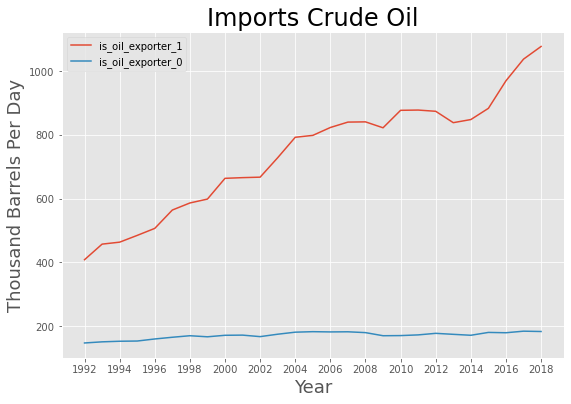

In [35]:
#code from Clarence
# making dummy columns for landlocked and nuclear countries
landlocked = ['Afghanistan', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bhutan',
              'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad',
              'Czech Republic','Eswatini', 'Ethiopia', 'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
              'Lesotho', 'Liechtenstein','Luxembourg', 'Malawi', 'Mali', 'Moldova', 'Mongolia',
              'Nepal', 'Niger', 'North Macedonia', 'Paraguay','Rwanda', 'San Marino', 'Serbia',
              'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan','Turkmenistan', 'Uganda',
              'Uzbekistan', 'Vatican City', 'Zambia', 'Zimbabwe']

nuclear = ['Argentina', 'Armenia', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'China',
           'Czech Republic', 'Finland', 'France', 'Germany', 'Hungary', 'India', 'Iran', 'Japan',
           'Kazakhstan', 'Lithuania', 'Mexico', 'Netherlands', 'Pakistan', 'Romania', 'Russia',
           'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
           'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']

least_developed = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso',
                   'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros',
                   'Congo-Brazzaville', 'Congo-Kinshasa', 'Djibouti', 'Ethiopia', 'Gambia, The',
                   'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos',  'Lesotho', 'Liberia',
                   'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal',
                   'Niger', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
                   'Solomon Islands', 'Somalia', 'Sudan', 'Togo', 'Uganda', 'Tanzania', 'Yemen',
                   'Zambia']

oil_exporters = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran',
                 'Iraq', 'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates',
                 'Venezuela', 'United States', 'Russia', 'China']

opec = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran', 'Iraq',
        'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates','Venezuela']

main_df['is_landlocked'] = main_df['country'].map(lambda x: 1 if x in landlocked else 0)
main_df['is_nuclear'] = main_df['country'].map(lambda x: 1 if x in nuclear else 0)
main_df['is_least_developed'] = main_df['country'].map(lambda x: 1 if x in least_developed else 0)
main_df['is_oil_exporter'] = main_df['country'].map(lambda x: 1 if x in oil_exporters else 0)
main_df['is_opec'] = main_df['country'].map(lambda x: 1 if x in opec else 0)

def comparison_plots(dummy_var, column):
    if not dummy_var.startswith('is_'):
        pass
    if (column.startswith('is_')) | (column == 'year') | (column == 'country'):
        pass
    
    ylabels_dict = {'population':'Thousands','life_expectancy':'Years','ppp_2015USD':'Billions in 2015USD',
                'consumption_per_capita':'Million British Thermal Units Per Capita',
                'consumption_per_GDP':'Thousand British Thermal Units Per 2015$ GDP PPP',
                'production_total':'Quadrillion British Thermal Units',
                'production_coal':'Quadrillion British Thermal Units',
                'production_natural_gas':'Quadrillion British Thermal Units',
                'production_petrolium_and_other_liquids':'Quadrillion British Thermal Units',
                'production_nuclear':'Quadrillion British Thermal Units',
                'production_nuclear_renewables_and_other':'Quadrillion British Thermal Units',
                'production_renewables_and_other':'Quadrillion British Thermal Units',
                'consumption_total':'Quadrillion British Thermal Units',
                'consumption_coal':'Quadrillion British Thermal Units',
                'consumption_natural_gas':'Quadrillion British Thermal Units',
                'consumption_petrolium_and_other_liquids':'Quadrillion British Thermal Units',
                'consumption_nuclear':'Quadrillion British Thermal Units',
                'consumption_nuclear_renewables_and_other':'Quadrillion British Thermal Units',
                'consumption_renewables_and_other':'Quadrillion British Thermal Units',
                'imports_crude_oil':'Thousand Barrels Per Day',
                'imports_natural_gas':'Billion Cubic Feet',
                'imports_coal':'Million Short Tons',
                'imports_electricity':'Billion kilowatt-hour',
                'exports_crude_oil':'Thousand Barrels Per Day',
                'exports_natural_gas':'Billion Cubic Feet',
                'exports_coal':'Million Short Tons',
                'exports_electricity':'Billion Kilowatt-Hour',
                'emissions_co2_emissions':'Million Tons CO2',
                'emissions_coal_and_coke':'Million Tons CO2',
                'emissions_consumed_natural_gas':'Million Tons CO2',
                'emissions_petroleum_and_other_liquids':'Million Tons CO2'}
    
    is_group = main_df.groupby([str(dummy_var),'year']).mean().loc[1,column]
    is_not_group = main_df.groupby([str(dummy_var),'year']).mean().loc[0,column]
    is_group.plot(figsize=(9,6), grid=True, label=dummy_var+'_1')
    is_not_group.plot(figsize=(9,6), grid=True, label=dummy_var+'_0')
    plt.title(label=column.replace('_',' ').title(), fontdict={'size':24})
    plt.xlabel(xlabel='Year', fontdict={'size':18})
    plt.xticks(list(range(1992,2020,2)))
    plt.ylabel(ylabel= ylabels_dict[column], fontdict={'size':18})
    plt.legend()

comparison_plots('is_oil_exporter','imports_crude_oil')

In [36]:
main_df.drop(columns= ['oil_exporting'],inplace= True)

In [37]:
main_df.head()

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,is_landlocked,is_nuclear,is_least_developed,is_oil_exporter,is_opec
1,Afghanistan,1992,14485.5000,51.641,2.159523,1.042253,30.01360,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.0,0.000000,0.131,0.0,0.0000,0.0,0.000,1.704078,0.015551,0.588528,1.1,1,0,1,0,0
2,Albania,1992,3245.8900,71.802,25.937798,8.087302,10.41030,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.0,104.719450,0.104,0.0,0.0000,0.0,0.560,3.901890,0.502372,0.199519,3.2,0,0,0,0,0
3,Algeria,1992,27028.3000,67.575,48.164981,5.592648,232.77300,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.0,1139.243484,0.125,279.4,1240.6159,0.0,1.061,74.390488,2.687475,45.703013,26.0,0,0,0,1,1
4,Angola,1992,12657.4000,45.230,6.689229,1.423070,59.49690,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.0,0.000000,0.000,508.4,0.0000,0.0,0.000,5.218203,0.000000,1.118203,4.1,0,0,1,1,1
5,Antigua and Barbuda,1992,64.9886,72.006,91.763340,5.867116,1.01644,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.005964,0.000000,0.000000,0.005964,NaN,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0000,0.0,0.000,0.400000,0.000000,0.000000,0.4,0,0,0,0,0


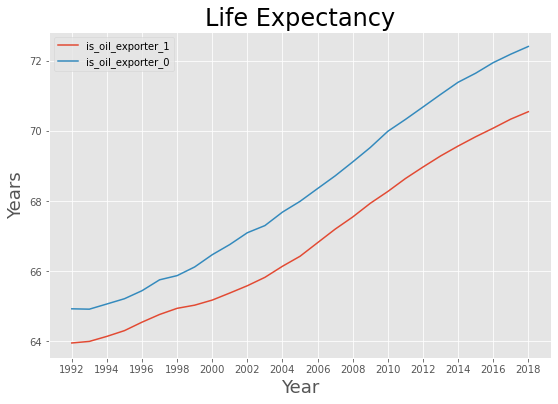

In [38]:
comparison_plots('is_oil_exporter','life_expectancy')
plt.savefig('life_expectancy_oil_exporters')

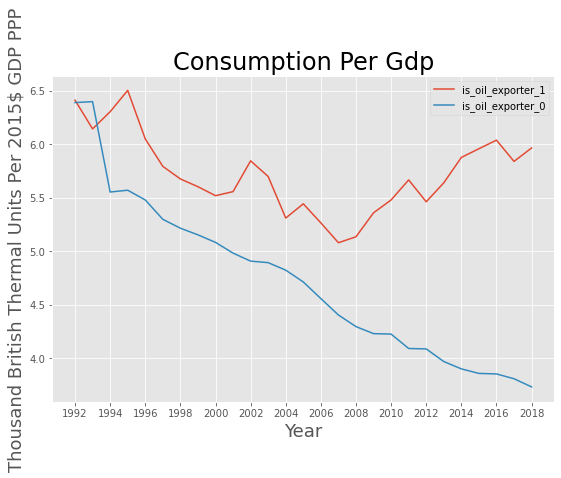

In [39]:
comparison_plots('is_oil_exporter','consumption_per_GDP')
plt.savefig ('comsumption_per_GDP_oil_exporters')

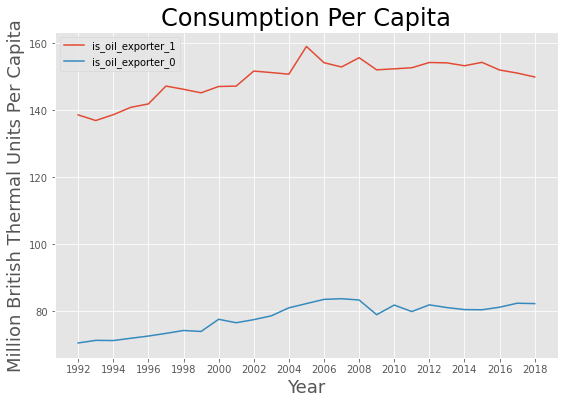

In [40]:
comparison_plots('is_oil_exporter','consumption_per_capita')
plt.savefig ('comsumption_per_capita_oil_exporters')

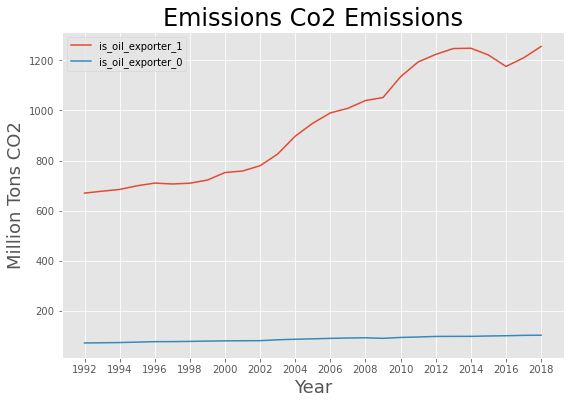

In [41]:
comparison_plots('is_oil_exporter','emissions_co2_emissions')
plt.savefig ('co2_emissions_oil_exporters')

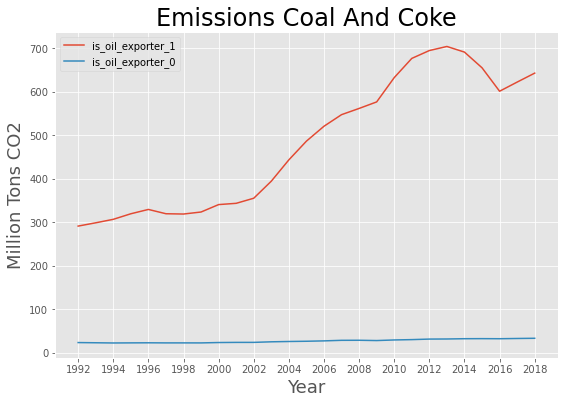

In [42]:
comparison_plots('is_oil_exporter','emissions_coal_and_coke')
plt.savefig ('coal_emissions_oil_exporters')

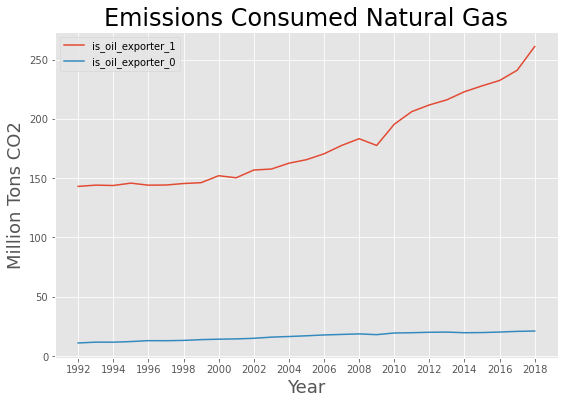

In [43]:
comparison_plots('is_oil_exporter','emissions_consumed_natural_gas')
plt.savefig ('natural_gas_emissions_oil_exporters')

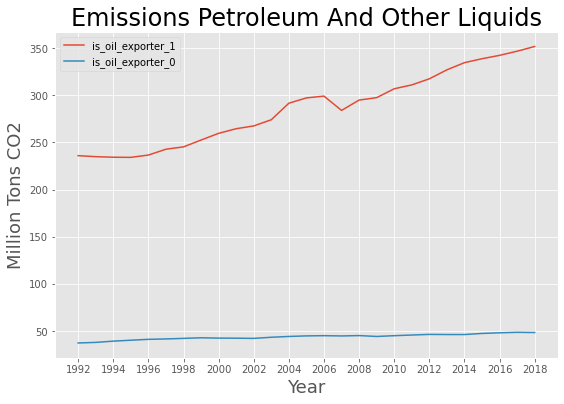

In [44]:
comparison_plots('is_oil_exporter','emissions_petroleum_and_other_liquids')
plt.savefig ('petroleum_emissions_oil_exporters')

### Checking model assumptions

In [45]:
df = pd.read_csv ('../data/cleaned_energy_data.csv')

In [46]:
landlocked = ['Afghanistan', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bhutan',
              'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad',
              'Czech Republic','Eswatini', 'Ethiopia', 'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
              'Lesotho', 'Liechtenstein','Luxembourg', 'Malawi', 'Mali', 'Moldova', 'Mongolia',
              'Nepal', 'Niger', 'North Macedonia', 'Paraguay','Rwanda', 'San Marino', 'Serbia',
              'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan','Turkmenistan', 'Uganda',
              'Uzbekistan', 'Vatican City', 'Zambia', 'Zimbabwe']

nuclear = ['Argentina', 'Armenia', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'China',
           'Czech Republic', 'Finland', 'France', 'Germany', 'Hungary', 'India', 'Iran', 'Japan',
           'Kazakhstan', 'Lithuania', 'Mexico', 'Netherlands', 'Pakistan', 'Romania', 'Russia',
           'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
           'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']

least_developed = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso',
                   'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros',
                   'Congo-Brazzaville', 'Congo-Kinshasa', 'Djibouti', 'Ethiopia', 'Gambia, The',
                   'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos',  'Lesotho', 'Liberia',
                   'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal',
                   'Niger', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
                   'Solomon Islands', 'Somalia', 'Sudan', 'Togo', 'Uganda', 'Tanzania', 'Yemen',
                   'Zambia']

oil_exporters = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran',
                 'Iraq', 'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates',
                 'Venezuela', 'United States', 'Russia', 'China']

opec = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran', 'Iraq',
        'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates','Venezuela']

df['is_landlocked'] = df['country'].map(lambda x: 1 if x in landlocked else 0)
df['is_nuclear'] = df['country'].map(lambda x: 1 if x in nuclear else 0)
df['is_least_developed'] = df['country'].map(lambda x: 1 if x in least_developed else 0)
df['is_oil_exporter'] = df['country'].map(lambda x: 1 if x in oil_exporters else 0)
df['is_opec'] = df['country'].map(lambda x: 1 if x in opec else 0)

In [47]:
df=df.set_index(['country','year'])

In [48]:
#dropping "World" rows
df.drop('World',level=0, axis= 0, inplace=True)

In [49]:
#viewing first 5 rows and dimensions of dataframe
display(df.head())
display (df.shape)


,,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,is_landlocked,is_nuclear,is_least_developed,is_oil_exporter,is_opec
country,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1992,14485.5000,51.641,2.159523,1.042253,30.01360,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.0,0.000000,0.131,0.0,0.0000,0.0,0.000,1.704078,0.015551,0.588528,1.1,1,0,1,0,0
Albania,1992,3245.8900,71.802,25.937798,8.087302,10.41030,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.0,104.719450,0.104,0.0,0.0000,0.0,0.560,3.901890,0.502372,0.199519,3.2,0,0,0,0,0
Algeria,1992,27028.3000,67.575,48.164981,5.592648,232.77300,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.0,1139.243484,0.125,279.4,1240.6159,0.0,1.061,74.390488,2.687475,45.703013,26.0,0,0,0,1,1
Angola,1992,12657.4000,45.230,6.689229,1.423070,59.49690,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.0,0.000000,0.000,508.4,0.0000,0.0,0.000,5.218203,0.000000,1.118203,4.1,0,0,1,1,1
Antigua and Barbuda,1992,64.9886,72.006,91.763340,5.867116,1.01644,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.005964,0.000000,0.000000,0.005964,NaN,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0000,0.0,0.000,0.400000,0.000000,0.000000,0.4,0,0,0,0,0


(4697, 36)

In [50]:
years = df.index.get_level_values('year').to_list()
df['year'] = pd.Categorical(years)

years

[1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,

In [51]:
#imports
from linearmodels import PooledOLS
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import numpy.linalg as la
from scipy import stats


In [52]:
df.head()

,,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,is_landlocked,is_nuclear,is_least_developed,is_oil_exporter,is_opec,year
country,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1992,14485.5000,51.641,2.159523,1.042253,30.01360,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.0,0.000000,0.131,0.0,0.0000,0.0,0.000,1.704078,0.015551,0.588528,1.1,1,0,1,0,0,1992
Albania,1992,3245.8900,71.802,25.937798,8.087302,10.41030,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.0,104.719450,0.104,0.0,0.0000,0.0,0.560,3.901890,0.502372,0.199519,3.2,0,0,0,0,0,1992
Algeria,1992,27028.3000,67.575,48.164981,5.592648,232.77300,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.0,1139.243484,0.125,279.4,1240.6159,0.0,1.061,74.390488,2.687475,45.703013,26.0,0,0,0,1,1,1992
Angola,1992,12657.4000,45.230,6.689229,1.423070,59.49690,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.0,0.000000,0.000,508.4,0.0000,0.0,0.000,5.218203,0.000000,1.118203,4.1,0,0,1,1,1,1992
Antigua and Barbuda,1992,64.9886,72.006,91.763340,5.867116,1.01644,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.005964,0.000000,0.000000,0.005964,NaN,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0000,0.0,0.000,0.400000,0.000000,0.000000,0.4,0,0,0,0,0,1992


### All countries 

In [53]:
exog = sm.tools.tools.add_constant(df[['emissions_co2_emissions', 'emissions_coal_and_coke',
                                       'emissions_consumed_natural_gas','consumption_per_capita', ]])
endog = df['life_expectancy']
model = PooledOLS (endog, exog)
pooledOLS_res = model.fit(cov_type='clustered', cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids


<Figure size 720x720 with 0 Axes>

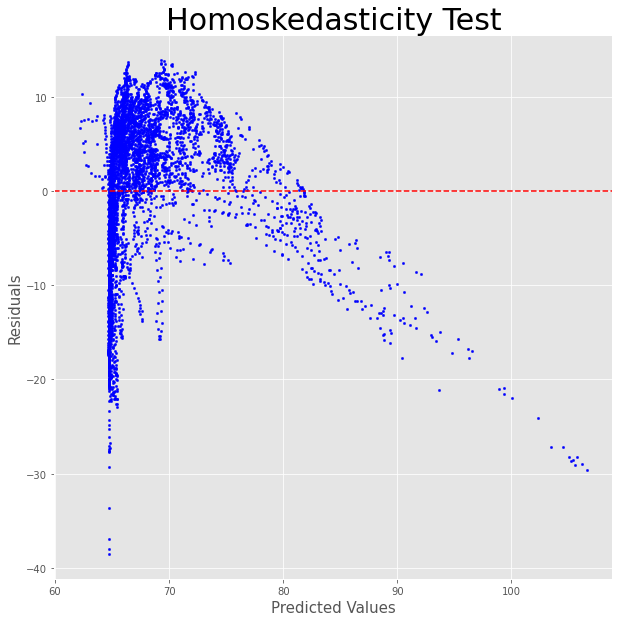

In [54]:
#checking for homoskedasticity
fig = plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue', s= 5)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [55]:
#Checking for Heteroskedasticity
#A) White Test
pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(df[['emissions_co2_emissions','emissions_consumed_natural_gas',
                                      'consumption_per_capita','emissions_coal_and_coke']]).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

#B) Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

#credit: https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8

{'LM-Stat': 908.9486719520442, 'LM p-val': 5.2213917198208466e-185, 'F-Stat': 80.24664386463432, 'F p-val': 2.6762070678457837e-206}
{'LM-Stat': 31.45490444430332, 'LM p-val': 2.47220274109327e-06, 'F-Stat': 7.908315568166851, 'F p-val': 2.3821616955203534e-06}


The above results p < 0.05 show that there is heteroskedasticity

In [56]:
#Checking for Autocorrelation
#Durbin Watson Test

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.7827157345276308


In [57]:
df.head()

,,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,is_landlocked,is_nuclear,is_least_developed,is_oil_exporter,is_opec,year
country,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1992,14485.5000,51.641,2.159523,1.042253,30.01360,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.0,0.000000,0.131,0.0,0.0000,0.0,0.000,1.704078,0.015551,0.588528,1.1,1,0,1,0,0,1992
Albania,1992,3245.8900,71.802,25.937798,8.087302,10.41030,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.0,104.719450,0.104,0.0,0.0000,0.0,0.560,3.901890,0.502372,0.199519,3.2,0,0,0,0,0,1992
Algeria,1992,27028.3000,67.575,48.164981,5.592648,232.77300,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.0,1139.243484,0.125,279.4,1240.6159,0.0,1.061,74.390488,2.687475,45.703013,26.0,0,0,0,1,1,1992
Angola,1992,12657.4000,45.230,6.689229,1.423070,59.49690,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.0,0.000000,0.000,508.4,0.0000,0.0,0.000,5.218203,0.000000,1.118203,4.1,0,0,1,1,1,1992
Antigua and Barbuda,1992,64.9886,72.006,91.763340,5.867116,1.01644,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.005964,0.000000,0.000000,0.005964,NaN,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0000,0.0,0.000,0.400000,0.000000,0.000000,0.4,0,0,0,0,0,1992


There is positive autocorrelation in the model because the durbin watson statistic < 2. The assumptions of homoskedasticy and no autocorrelation have been violated. As such, we have to utilze a fixed effects and random effects model.

In [58]:
df.head()

,,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,is_landlocked,is_nuclear,is_least_developed,is_oil_exporter,is_opec,year
country,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1992,14485.5000,51.641,2.159523,1.042253,30.01360,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.0,0.000000,0.131,0.0,0.0000,0.0,0.000,1.704078,0.015551,0.588528,1.1,1,0,1,0,0,1992
Albania,1992,3245.8900,71.802,25.937798,8.087302,10.41030,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.0,104.719450,0.104,0.0,0.0000,0.0,0.560,3.901890,0.502372,0.199519,3.2,0,0,0,0,0,1992
Algeria,1992,27028.3000,67.575,48.164981,5.592648,232.77300,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.0,1139.243484,0.125,279.4,1240.6159,0.0,1.061,74.390488,2.687475,45.703013,26.0,0,0,0,1,1,1992
Angola,1992,12657.4000,45.230,6.689229,1.423070,59.49690,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.0,0.000000,0.000,508.4,0.0000,0.0,0.000,5.218203,0.000000,1.118203,4.1,0,0,1,1,1,1992
Antigua and Barbuda,1992,64.9886,72.006,91.763340,5.867116,1.01644,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.005964,0.000000,0.000000,0.005964,NaN,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0000,0.0,0.000,0.400000,0.000000,0.000000,0.4,0,0,0,0,0,1992


In [85]:
#Fixed Effects and Random Effects Model

exog = sm.tools.tools.add_constant(df[['emissions_co2_emissions','emissions_coal_and_coke',
                                       'emissions_petroleum_and_other_liquids', 'consumption_per_capita']])
endog = df['life_expectancy']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:        life_expectancy   R-squared:                        0.0803
Estimator:              RandomEffects   R-squared (Between):              0.1422
No. Observations:                4697   R-squared (Within):               0.0490
Date:                Thu, Dec 02 2021   R-squared (Overall):              0.1370
Time:                        21:19:10   Log-likelihood                -1.199e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      102.43
Entities:                         178   P-value                           0.0000
Avg Obs:                       26.388   Distribution:                  F(4,4692)
Min Obs:                       0.0000                                           
Max Obs:                       27.000   F-statistic (robust):             66.525
                            

In [60]:
# function to perform Hausman Test to indicate preferred model
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    
    

    df= b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval


In [61]:
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared:' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared:52.156401754700994
degrees of freedom: 5
p-Value: 5.010652111932133e-10


Because the p value is < 0.05, we reject the null hypothesis that the preferred model is random effects. 

## Oil Exporting Countries

In [62]:
oil_exporters = df[df['is_oil_exporter']==1]
oil_exporters.shape

(432, 37)

In [80]:
#Fixed Effects and Random Effects Model

exog_oil = sm.tools.tools.add_constant(oil_exporters[['emissions_co2_emissions','emissions_coal_and_coke',
                                       'emissions_petroleum_and_other_liquids', 'consumption_per_capita']])
endog_oil = oil_exporters['life_expectancy']
# random effects model
model_re_oil = RandomEffects(endog_oil, exog_oil) 
re_res_oil = model_re_oil.fit() 
# fixed effects model
model_fe_oil = PanelOLS(endog_oil, exog_oil, entity_effects = True) 
fe_res_oil = model_fe_oil.fit() 
#print results
print(re_res_oil)
print(fe_res_oil)

                        RandomEffects Estimation Summary                        
Dep. Variable:        life_expectancy   R-squared:                        0.1817
Estimator:              RandomEffects   R-squared (Between):              0.1398
No. Observations:                 432   R-squared (Within):               0.1834
Date:                Thu, Dec 02 2021   R-squared (Overall):              0.1433
Time:                        19:02:18   Log-likelihood                   -995.03
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.696
Entities:                         173   P-value                           0.0000
Avg Obs:                       2.4971   Distribution:                   F(4,427)
Min Obs:                       0.0000                                           
Max Obs:                       27.000   F-statistic (robust):             23.696
                            

In [81]:
hausman_results_oil = hausman(fe_res_oil, re_res_oil) 
print('chi-Squared:' + str(hausman_results_oil[0]))
print('degrees of freedom: ' + str(hausman_results_oil[1]))
print('p-Value: ' + str(hausman_results_oil[2]))

chi-Squared:12.580515098293887
degrees of freedom: 5
p-Value: 0.027643502813343802


## Non-oil Exporters

In [65]:
non_oil_exporters = df[df['is_oil_exporter']==0]
non_oil_exporters.shape

(4265, 37)

In [73]:
#Fixed Effects and Random Effects Model

exog_non_oil = sm.tools.tools.add_constant(non_oil_exporters[['emissions_co2_emissions','emissions_coal_and_coke',
                                        'consumption_per_capita','emissions_petroleum_and_other_liquids']])
endog_non_oil = non_oil_exporters['life_expectancy']
# random effects model
model_re_non_oil = RandomEffects(endog_non_oil, exog_non_oil) 
re_res_non_oil = model_re_non_oil.fit() 
# fixed effects model
model_fe_non_oil = PanelOLS(endog_non_oil, exog_non_oil, entity_effects = True) 
fe_res_non_oil = model_fe_non_oil.fit() 
#print results
print(re_res_non_oil)
print(fe_res_non_oil)

                        RandomEffects Estimation Summary                        
Dep. Variable:        life_expectancy   R-squared:                        0.0983
Estimator:              RandomEffects   R-squared (Between):              0.2479
No. Observations:                4265   R-squared (Within):               0.0591
Date:                Thu, Dec 02 2021   R-squared (Overall):              0.2362
Time:                        18:51:53   Log-likelihood                -1.092e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      116.16
Entities:                         178   P-value                           0.0000
Avg Obs:                       23.961   Distribution:                  F(4,4260)
Min Obs:                       0.0000                                           
Max Obs:                       27.000   F-statistic (robust):             78.724
                            

In [83]:
hausman_results_non_oil = hausman(fe_res_non_oil, re_res_non_oil) 
print('chi-Squared:' + str(hausman_results_non_oil[0]))
print('degrees of freedom: ' + str(hausman_results_non_oil[1]))
print('p-Value: ' + str(hausman_results_non_oil[2]))

chi-Squared:26.22644450642154
degrees of freedom: 5
p-Value: 8.064966848034515e-05


### LDCs

In [68]:
ldc = df[df['is_least_developed']==1]
ldc.shape

(1134, 37)

In [78]:
#Fixed Effects and Random Effects Model

exog_ldc = sm.tools.tools.add_constant(ldc[['emissions_co2_emissions','emissions_coal_and_coke', 'consumption_per_capita', "emissions_petroleum_and_other_liquids"]])
endog_ldc = ldc['life_expectancy']
# random effects model
model_re_ldc = RandomEffects(endog_ldc, exog_ldc) 
re_res_ldc = model_re_ldc.fit() 
# fixed effects model
model_fe_ldc = PanelOLS(endog_ldc, exog_ldc, entity_effects = True) 
fe_res_ldc = model_fe_ldc.fit() 
#print results
print(re_res_ldc)
print(fe_res_ldc)

                        RandomEffects Estimation Summary                        
Dep. Variable:        life_expectancy   R-squared:                        0.2406
Estimator:              RandomEffects   R-squared (Between):              0.0474
No. Observations:                1134   R-squared (Within):               0.2473
Date:                Thu, Dec 02 2021   R-squared (Overall):              0.1320
Time:                        18:56:37   Log-likelihood                   -3241.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      89.424
Entities:                         177   P-value                           0.0000
Avg Obs:                       6.4068   Distribution:                  F(4,1129)
Min Obs:                       0.0000                                           
Max Obs:                       27.000   F-statistic (robust):             89.424
                            

In [84]:
hausman_results_ldc = hausman(fe_res_ldc, re_res_ldc) 
print('chi-Squared:' + str(hausman_results_ldc[0]))
print('degrees of freedom: ' + str(hausman_results_ldc[1]))
print('p-Value: ' + str(hausman_results_ldc[2]))

chi-Squared:8.2046063200278
degrees of freedom: 5
p-Value: 0.14531404436440357
